In [70]:
import networkx as nx
import csv
import random
import pandas as pd

# 1. Load training and comepetition data with its features

In [71]:
#returns a list of lists, all floats no headers
def read_csv2list(path):
    observations = []
    with open(path, newline='') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        header = True
        for row in csv_reader:
            int_row = []
            if header == False:
                for element in row:
                    int_row.append(float(element))
                observations.append(int_row)
            header = False
            
    return observations

In [72]:
#read features of training and comeptition data
X_comp = read_csv2list("test_features.csv")
X_sample = read_csv2list("all_features.csv")

In [73]:
#edit if your adding shortest path
feature_names = ['in_common', 'out_common','in_JC', 'out_JC','in_SI', 'out_SI',
                 'in_HP', 'out_HP', 'in_HD', 'out_HD','in_RA', 'out_RA', 'shortest_path']

df_X = pd.DataFrame(X_sample, columns= feature_names)
df_comp_X = pd.DataFrame(X_comp, columns=feature_names)

# 2. Normalization

In [74]:
#Normalize data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_X[feature_names])
st_df_X = pd.DataFrame(scaler.transform(df_X[feature_names]), columns = df_X.columns)
st_df_comp_X = pd.DataFrame(scaler.transform(df_comp_X[feature_names]), columns = df_comp_X.columns)

# 3. Model Training and Predictions

In [75]:
#Split data for validation
from sklearn.model_selection import train_test_split

n = 50000 #size of real data, or half of all sampled data
X = st_df_X
y = pd.DataFrame([1]*n + [0]*(n-1), columns = ['Label']) #**************Fix that -1 if its not the case
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
# train model
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(random_state=0).fit(X_train, y_train)
print ( 'Logistic Regression Acc ' + str(model_LR.score(X_test, y_test)))

/Users/miguelrosasraya/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Acc 0.9953


In [82]:
#Get predictions competition data
y_comp_LR_label = model_LR.predict(st_df_comp_X)
y_comp_LR_pr = model_LR.predict_proba(st_df_comp_X)
y_comp_LR_pr = [val2 for val1, val2 in y_comp_LR_pr]

labels_comp_LR = []
i = 1
for prob, label in zip(y_comp_LR_pr,y_comp_LR_label):
    labels_comp_LR.append([i, prob, label])
    i = i + 1

# 4. Comparision of Training Data and Competition Data

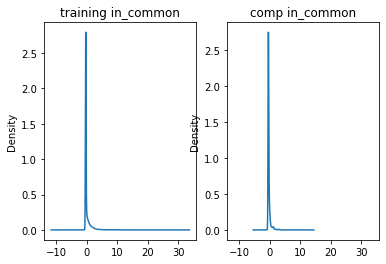

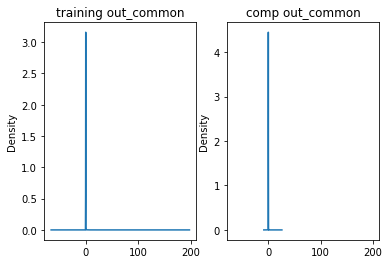

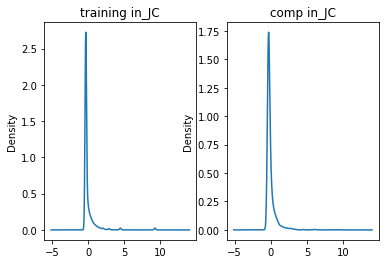

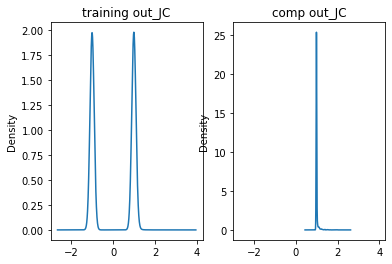

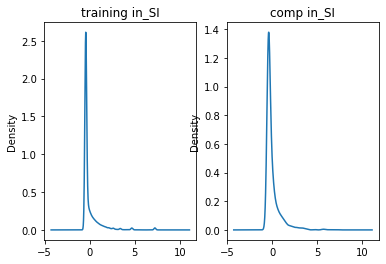

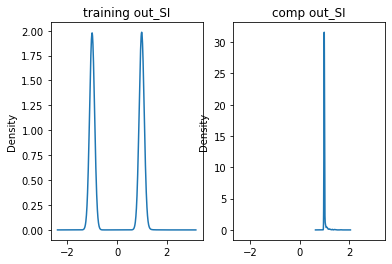

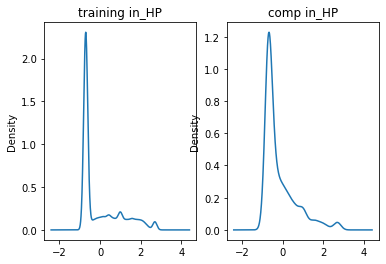

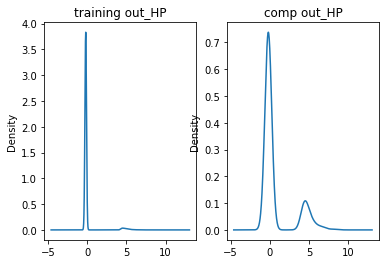

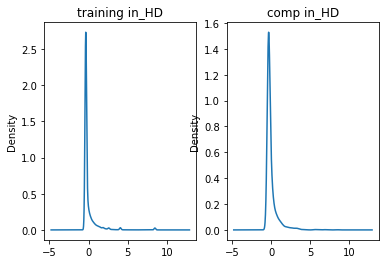

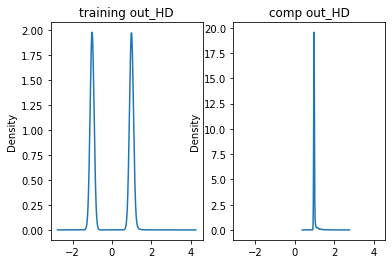

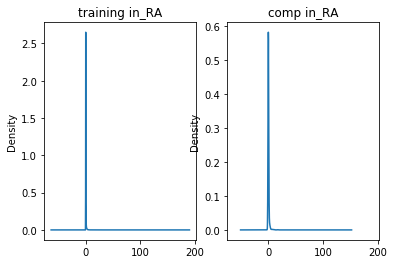

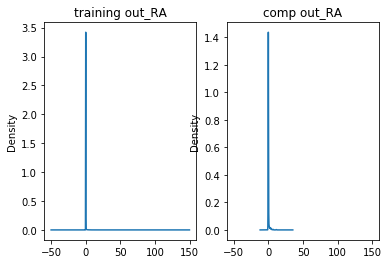

In [83]:
import matplotlib.pyplot as plt

features = list(st_df_X.columns)
for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
    st_df_X[feature].plot(ax=axes[0], kind='density', sharex=False, title = 'training '+ feature)
    st_df_comp_X[feature].plot(ax=axes[1], kind='density', sharex=False, title = 'comp '+ feature)
    plt.show()
    

# 5. Analysis of error in training

In [84]:
pred_test_label = pd.DataFrame(model_LR.predict(X_test), columns = ['Label'])
real_test_label = y_test

test_right_X = []
test_wrong_X = []

for obs in range(0,len(X_test)):
    if pred_test_label.iloc[obs][0] == real_test_label.iloc[obs][0]:
        test_right_X.append(list(X_test.iloc[obs]))
    else:
        test_wrong_X.append(list(X_test.iloc[obs]))
print(len(test_wrong_X))    
print(len(test_right_X))    

94
19906


In [85]:
test_wrong_X = pd.DataFrame(test_wrong_X, columns=feature_names)
test_right_X = pd.DataFrame(test_right_X, columns=feature_names)

In [86]:
test_wrong_X.head()

,in_common,out_common,in_JC,out_JC,in_SI,out_SI,in_HP,out_HP,in_HD,out_HD,in_RA,out_RA
0,-0.390232,-0.051088,-0.341689,0.986693,-0.431133,0.987166,-0.704348,-0.198547,-0.365925,0.984828,-0.22545,-0.091672
1,-0.390232,-0.051088,-0.341689,0.986693,-0.431133,0.987166,-0.704348,-0.198547,-0.365925,0.984828,-0.22545,-0.091672
2,-0.390232,-0.051088,-0.341689,0.986693,-0.431133,0.987166,-0.704348,-0.198547,-0.365925,0.984828,-0.22545,-0.091672
3,-0.390232,-0.051088,-0.341689,0.986693,-0.431133,0.987166,-0.704348,-0.198547,-0.365925,0.984828,-0.22545,-0.091672
4,-0.390232,-0.051088,-0.341689,0.986693,-0.431133,0.987166,-0.704348,-0.198547,-0.365925,0.984828,-0.22545,-0.091672


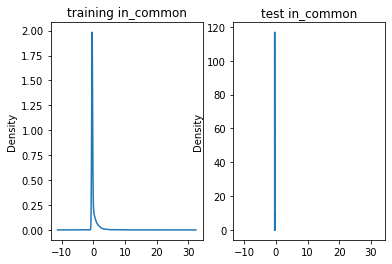

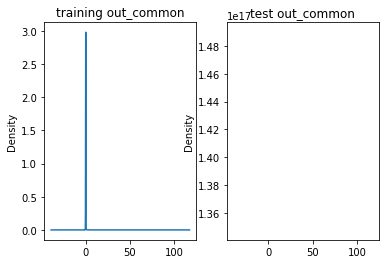

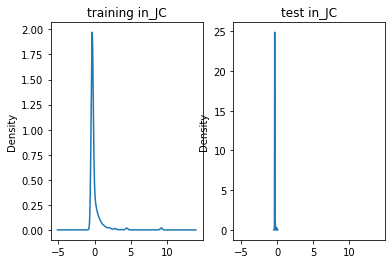

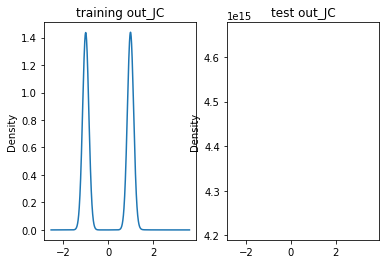

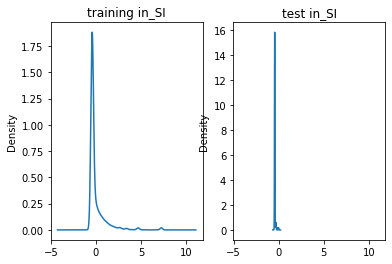

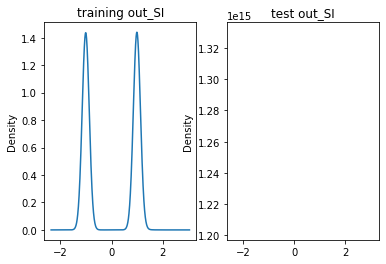

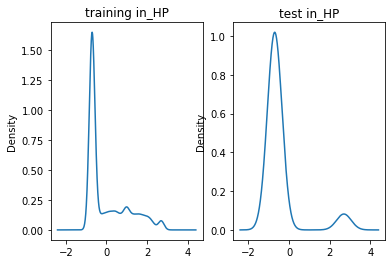

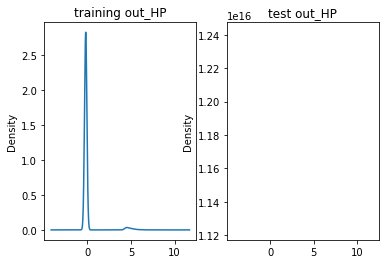

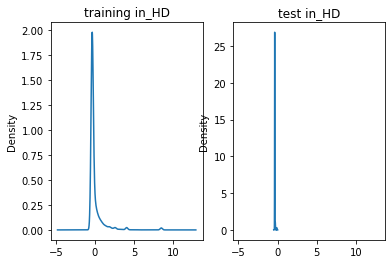

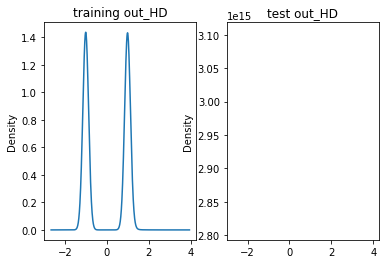

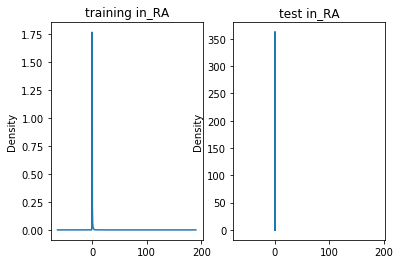

LinAlgError: singular matrix

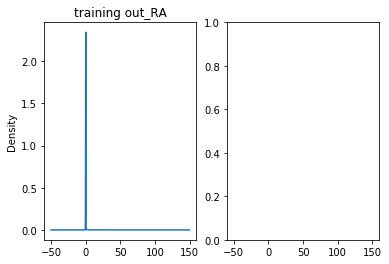

In [87]:
features = list(st_df_X.columns)
for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
    test_right_X[feature].plot(ax=axes[0], kind='density', sharex=False, title = 'training '+ feature)
    test_wrong_X[feature].plot(ax=axes[1], kind='density', sharex=False, title = 'test '+ feature)
    plt.show()